In [53]:
l = [1,2,3]
l.append([1,23])
l

[1, 2, 3, [1, 23]]

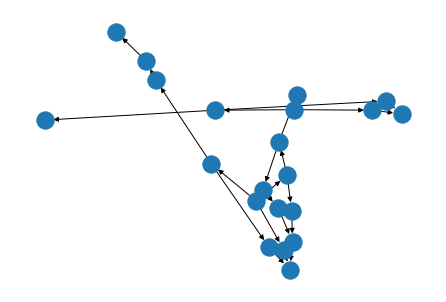

In [41]:
from networkx.readwrite import json_graph
import networkx as nx
from pathlib import Path 
from deepa2datasets.config import data_dir
import json

file = Path(data_dir,"raw","nodeset6059.json")
data = json.load(file.open())
data['directed']=True
attrs = {'source':'fromID', 'target':'toID', 'name':'nodeID','key':'key', 'link':'edges'}
H = json_graph.node_link_graph(data,attrs=attrs)
nx.draw(H)

In [42]:
json_graph.node_link_data(H)

{'directed': True,
 'multigraph': True,
 'graph': {},
 'nodes': [{'text': 'AM : You think that as well?',
   'type': 'L',
   'timestamp': '2014-02-12 15:15:41',
   'id': '25644'},
  {'text': 'you are stretching your definition in order to make the British Empire fit into that?',
   'type': 'I',
   'timestamp': '2014-02-19 11:58:00',
   'id': '25884'},
  {'text': 'AM : Is it not the case that you are stretching your definition in order to make the British Empire fit into that?',
   'type': 'L',
   'timestamp': '2014-02-19 11:58:00',
   'id': '25887'},
  {'text': 'speak to those who are survivors',
   'type': 'I',
   'timestamp': '2014-02-19 11:58:00',
   'id': '25888'},
  {'text': 'They did see this as being like under the Third Reich in effect.',
   'type': 'I',
   'timestamp': '2014-02-19 11:58:00',
   'id': '25889'},
  {'text': 'ES :  Well actually, speak to those who are survivors',
   'type': 'L',
   'timestamp': '2014-02-19 11:58:00',
   'id': '25891'},
  {'text': 'ES : They did s

In [43]:
types = nx.get_node_attributes(H, "type")
texts = nx.get_node_attributes(H, "text")
types

{'25644': 'L',
 '25884': 'I',
 '25887': 'L',
 '25888': 'I',
 '25889': 'I',
 '25891': 'L',
 '25893': 'L',
 '25898': 'L',
 '111672': 'YA',
 '111677': 'I',
 '111678': 'YA',
 '111680': 'TA',
 '111681': 'YA',
 '111682': 'YA',
 '111683': 'RA',
 '111684': 'TA',
 '111685': 'YA',
 '111686': 'TA',
 '111687': 'TA',
 '111688': 'YA',
 '111689': 'YA'}

In [47]:
# get all nodes of type CA / RA
inference_nodes = [n for n in H.nodes if types[n] in ["CA","RA"]]
print(inference_nodes)
for inference_node in inference_nodes:
    # get conclusion
    conclusions = [n for n in H.successors(inference_node) if types[n]=="I"]
    # get premises
    premises = [n for n in H.predecessors(inference_node) if types[n]=="I"]
    # get conjectures
    def get_L_grandparent(node):
        if types[node]!="I":
            return None
        ya_predecessors = [n for n in H.predecessors(node) if types[n]=="YA"]     
        if not ya_predecessors:
            return None
        l_grandparents = [n for m in ya_predecessors for n in H.predecessors(m) if types[n]=="L" and texts[n]!="analyses"]
        return l_grandparents
    conjectures = sorted([get_L_grandparent(n) for n in conclusions])
    reasons = sorted([get_L_grandparent(n) for n in premises])
    print([conclusions,conjectures,premises,reasons])

['111683']
[['25884'], [['25887']], ['25889'], [['25893']]]


In [36]:
import re
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [45]:
file = Path(data_dir,"raw","nodeset6059.txt")
text = file.open().readlines()
print(cleanhtml("".join(text)))

AM: It's the analysis I want to come to next. This kind of blanket
entitlement to a judicial approach to things

that happened in the past is usually reserved for criminal regimes, like
the Third Reich. Is it not the case

that you are stretching your definition in order to make the British
Empire fit into that?

ES: Well actually, speak to those who are survivors. They did see this
as being like under the Third Reich in

effect.

AM: You think that as well?

ES: Yes, I certainly do.


In [46]:
texts

{'25644': 'AM : You think that as well?',
 '25884': 'you are stretching your definition in order to make the British Empire fit into that?',
 '25887': 'AM : Is it not the case that you are stretching your definition in order to make the British Empire fit into that?',
 '25888': 'speak to those who are survivors',
 '25889': 'They did see this as being like under the Third Reich in effect.',
 '25891': 'ES :  Well actually, speak to those who are survivors',
 '25893': 'ES : They did see this as being like under the Third Reich in effect.',
 '25898': 'ES : Yes, I certainly do.',
 '111672': 'Assertive Questioning',
 '111677': 'ES thinks / does not think that',
 '111678': 'Pure Questioning',
 '111680': 'TA',
 '111681': 'Asserting',
 '111682': 'Asserting',
 '111683': 'RA',
 '111684': 'TA',
 '111685': 'Arguing',
 '111686': 'TA',
 '111687': 'TA',
 '111688': 'Agreeing',
 '111689': 'Asserting'}

In [50]:
from deepa2datasets.config import template_dir
import random
from typing import Any,List,Dict
from dataclasses import asdict
from tqdm import tqdm 
import pandas as pd

In [2]:
from deepa2datasets.nli_builder import eSNLIBuilder

In [3]:
builder = eSNLIBuilder()

In [4]:
builder.fetch_input(None)
builder._input

{'p': 'This church choir sings to the masses as they sing joyous songs from the book at a church.',
 'he': 'The church is filled with song.',
 'hn': 'The church has cracks in the ceiling.',
 'hc': 'A choir singing at a baseball game.',
 'en': ['Not all churches have cracks in the ceiling',
  'There is no indication that there are cracks in the ceiling of the church.',
  'Not all churches have cracks in the ceiling.'],
 'ee': ['"Filled with song" is a rephrasing of the "choir sings to the masses."',
  'hearing song brings joyous in the church.',
  'If the church choir sings then the church is filled with song.'],
 'ec': ['A choir sing some other songs other than book at church during the base play. they cannot see book and play base ball same time.',
  'The choir is at a chruch not a baseball game.',
  'A baseball game isn’t played at a church.']}

In [5]:
builder.configure_product()
builder._product[0]

DeepA2Item(argument_source=None, title=None, gist=None, source_paraphrase=None, context=None, argdown_reconstruction=None, erroneous_argdown=None, reason_statements=None, conclusion_statements=None, premises=None, intermediary_conclusion=None, conclusion=None, premises_formalized=None, intermediary_conclusion_formalized=None, conclusion_formalized=None, predicate_placeholders=None, entity_placeholders=None, misc_placeholders=None, distractors=None, id='123-456', metadata={'config': eSNLIConfiguration(label='entailment', argdown_template_path='esnli/argdown_generic.txt', argdown_err_template_path='esnli/argdown_err-06.txt', source_paraphrase_template_path='esnli/source_paraphrase.txt', scheme_name='modus ponens', formal_scheme=['{p}', '{p} -> {q}', '{q}'], placeholders={'p': '{premise}', 'q': '{hypothesis}'}, nl_scheme=['{{ premise | lower }}', '{{ premise | conditional(hypothesis) }}', '{{ hypothesis | lower }}']), 'argument_mask': [1, 1, 1], 'distractor_mask': [1, 1], 'label': 'entail

In [6]:
builder.produce_da2item()
asdict(builder._product[0])

{'argument_source': 'this church choir sings to the masses as they sing joyous songs from the book at a church. the church is filled with song. A choir sing some other songs other than book at church during the base play. they cannot see book and play base ball same time. "Filled with song" is a rephrasing of the "choir sings to the masses." The church has cracks in the ceiling.',
 'title': None,
 'gist': '"Filled with song" is a rephrasing of the "choir sings to the masses."',
 'source_paraphrase': 'this church choir sings to the masses as they sing joyous songs from the book at a church. "filled with song" is a rephrasing of the "choir sings to the masses." therefore: the church is filled with song.',
 'context': None,
 'argdown_reconstruction': '(1) this church choir sings to the masses as they sing joyous songs from the book at a church.\n(2) this church choir sings to the masses as they sing joyous songs from the book at a church only if the church is filled with song.\n--\nwith m

In [7]:
asdict(builder._product[-8])

{'argument_source': '"Filled with song" is a rephrasing of the "choir sings to the masses." it is false that a choir singing at a baseball game. The church has cracks in the ceiling. this church choir sings to the masses as they sing joyous songs from the book at a church.',
 'title': None,
 'gist': 'A choir sing some other songs other than book at church during the base play. they cannot see book and play base ball same time.',
 'source_paraphrase': 'this church choir sings to the masses as they sing joyous songs from the book at a church. therefore: it is false that a choir singing at a baseball game.',
 'context': None,
 'argdown_reconstruction': '(1) this church choir sings to the masses as they sing joyous songs from the book at a church.\n(2) if this church choir sings to the masses as they sing joyous songs from the book at a church then it is wrong that a choir singing at a baseball game.\n--\nwith modus ponens from (1) (2)\n--\n(3) it is false that a choir singing at a basebal

In [8]:
builder.product

[{'argument_source': 'this church choir sings to the masses as they sing joyous songs from the book at a church. the church is filled with song. A choir sing some other songs other than book at church during the base play. they cannot see book and play base ball same time. "Filled with song" is a rephrasing of the "choir sings to the masses." The church has cracks in the ceiling.',
  'title': None,
  'gist': '"Filled with song" is a rephrasing of the "choir sings to the masses."',
  'source_paraphrase': 'this church choir sings to the masses as they sing joyous songs from the book at a church. "filled with song" is a rephrasing of the "choir sings to the masses." therefore: the church is filled with song.',
  'context': None,
  'argdown_reconstruction': '(1) this church choir sings to the masses as they sing joyous songs from the book at a church.\n(2) this church choir sings to the masses as they sing joyous songs from the book at a church only if the church is filled with song.\n--\n

In [5]:
from datasets import Dataset
my_dict = {"a": [1, 2, 3, 4],"b": [{"xx":"Hello"}, {"xx":"Hello2"}, {"xx":"Hello3"}, {"xx":"Hello4"}]}
dataset = Dataset.from_dict(my_dict)

In [6]:
dataset

Dataset({
    features: ['a', 'b'],
    num_rows: 4
})

In [21]:
from datasets import load_dataset

dataset = load_dataset("esnli")










Downloading: 90.2MB [00:00, 100MB/s]










Downloading: 99.4MB [00:00, 105MB/s]

Downloading: 7.50MB [00:00, 95.8MB/s]                   

Downloading: 7.44MB [00:00, 105MB/s]                    
  0%|          | 0/3 [14:54<?, ?it/s]


Dataset esnli downloaded and prepared to /Users/ggbetz/.cache/huggingface/datasets/esnli/plain_text/0.0.2/a160e6a02bbb8d828c738918dafec4e7d298782c334b5109af632fec6d779bbc. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 394.02it/s]


In [22]:
dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'explanation_1', 'explanation_2', 'explanation_3'],
        num_rows: 549367
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label', 'explanation_1', 'explanation_2', 'explanation_3'],
        num_rows: 9842
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label', 'explanation_1', 'explanation_2', 'explanation_3'],
        num_rows: 9824
    })
})

In [24]:
dataset["train"]["premise"][:9]

['A person on a horse jumps over a broken down airplane.',
 'A person on a horse jumps over a broken down airplane.',
 'A person on a horse jumps over a broken down airplane.',
 'Children smiling and waving at camera',
 'Children smiling and waving at camera',
 'Children smiling and waving at camera',
 'A boy is jumping on skateboard in the middle of a red bridge.',
 'A boy is jumping on skateboard in the middle of a red bridge.',
 'A boy is jumping on skateboard in the middle of a red bridge.']

In [57]:
# count records whose premise occurs less or more than three times in the dataset
premises = pd.Series(dataset["train"]["premise"])
counts = premises.value_counts()
counts[counts>3]

A dog in a field.                                                                                                                                              33
The ponies look like they love each other.                                                                                                                     30
Snow is dusted on the young boy's clothing making it appear that he has fallen several times.                                                                  30
When cars are all self driving, or we move away from commuting too much as we do, these will be seen only in museums.                                          30
The black cup sitting on the black saucer resembles a top hat.                                                                                                 30
                                                                                                                                                               ..
Skylights in a art gallery i

In [45]:
def check(batch):
    valid = len(set(batch["premise"]))==1
    if not valid:
        print(batch)
    return {"valid":[valid]}
set(dataset["train"].sort("premise").select(range(3000)).map(check, batched=True, batch_size=3, remove_columns=dataset["train"].column_names)['valid'])

Loading cached sorted indices for dataset at /Users/ggbetz/.cache/huggingface/datasets/esnli/plain_text/0.0.2/a160e6a02bbb8d828c738918dafec4e7d298782c334b5109af632fec6d779bbc/cache-0b5a98c1dadf8f32.arrow
 66%|██████▌   | 662/1000 [00:00<00:00, 3091.14ba/s]

{'premise': ['2 men are sparing, 1 is in the process of taking down the other.', '2 men are sparing, 1 is in the process of taking down the other.', '2 men are swimming in a pool in separate lanes as if racing.'], 'hypothesis': ['Nobody is sparing.', 'Humans sparing.', 'The two men are wet.'], 'label': [2, 0, 0], 'explanation_1': ['2 men and nobody are not the same', 'men are humans', 'Swimming in a pool makes one wet.'], 'explanation_2': ['', '', ''], 'explanation_3': ['', '', '']}
{'premise': ['2 men are swimming in a pool in separate lanes as if racing.', '2 men are swimming in a pool in separate lanes as if racing.', '2 men are working to clean the roof of a building with another man watching.'], 'hypothesis': ['The two men are having lunch at Dennys.', 'The two men are competing.', "Three men are watching The Gong Show in their mother's basement."], 'label': [2, 1, 2], 'explanation_1': ['Men who are swimming are not having lunch. There is not a pool at Dennys.', 'Two men swimming 

100%|██████████| 1000/1000 [00:00<00:00, 2820.68ba/s]

{'premise': ['A Beautiful young lady dancing on a loop', 'A Beautiful young lady dancing on a loop', 'A Black guy smiling while playing a guitar.'], 'hypothesis': ['The woman is beautiful.', 'The woman is dancing for her boyfriend.', 'The guy is a musician.'], 'label': [0, 1, 0], 'explanation_1': ['Woman and lady are the same.', 'Dancing does not imply dancing for her boyfriend.', 'IS IS A MUSICIAN BECAUSE HE PLAYS GUITAR.'], 'explanation_2': ['', '', ''], 'explanation_3': ['', '', '']}
{'premise': ['A Black guy smiling while playing a guitar.', 'A Black guy smiling while playing a guitar.', 'A Black male is beside a building with a sign on the building.'], 'hypothesis': ['The man playing the instrument is Caucasian.', 'The guy is enjoying the music.', 'A blond toddler stands next to a sign on a building.'], 'label': [2, 0, 2], 'explanation_1': ['Caucasian and Black are different races.', 'The guy is smiling which implies that he is enjoying himself.', 'The subject is either an adult m

{False, True}

In [42]:
dataset["train"].sort("premise")

Dataset({
    features: ['premise', 'hypothesis', 'label', 'explanation_1', 'explanation_2', 'explanation_3'],
    num_rows: 549367
})